In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("/home/kevindong1994/aunalytics/au_train.csv", header=0, delimiter=",")
test = pd.read_csv("/home/kevindong1994/aunalytics/au_test.csv", header=0, delimiter=",")
print(train.dtypes) # check the data type of each column


age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object


# Explore the dataset

In [2]:
train.select_dtypes(include="object").dtypes.index

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype='object')

In [3]:
train.describe(include='all') # The describe of the training dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [4]:
test.describe(include='all') # Check if the levels of categorical column are the same.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,16281.000000,16281,1.628100e+04,16281,16281.000000,16281,16281,16281,16281,16281,16281.000000,16281.000000,16281.000000,16281,16281
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K.
freq,NaN,11210,NaN,5283,NaN,7403,2032,6523,13946,10860,NaN,NaN,NaN,14662,12435
mean,38.767459,NaN,1.894357e+05,NaN,10.072907,NaN,NaN,NaN,NaN,NaN,1081.905104,87.899269,40.392236,NaN,NaN
std,13.849187,NaN,1.057149e+05,NaN,2.567545,NaN,NaN,NaN,NaN,NaN,7583.935968,403.105286,12.479332,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.167360e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.778310e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.383840e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## Note:
1. The level of "native-country" in test dataset and train dataset is different. That means we need to take care of it when we create dummy variables.
2. There are some strange values in "capital-gain" which is "99999.0000". We will investigate it later.

## Investigate the distribution of "class"

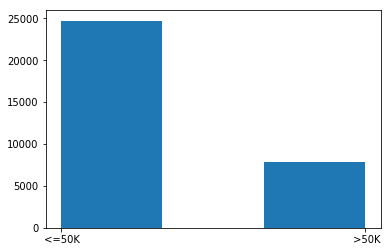

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(train["class"],bins=3)
plt.show() # The distribution of classes in the training dataset

## The data is imbalance!!

# Explore the features of each classes

In [6]:
train.groupby("class").mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
class,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


## Note:
1. The average age of higher salary is also higher.
2. The Capital-gain and loss of two classes is significantly different.

# The weird data "99999" in "capital-gain"

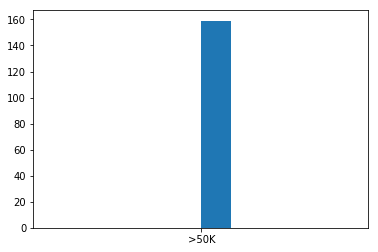

In [7]:
plt.hist(train.loc[train["capital-gain"]==99999][["class"]])
plt.show()

## Note:
1. The observations with 99999 "capital-gain" are all ">50k" class. We will create a new column to track this feature.

## Some more exploration

In [8]:
train.groupby("workclass").mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
workclass,,,,,,
?,40.960240,188516.338235,9.260349,606.795752,60.760349,31.919390
Federal-gov,42.590625,185221.243750,10.973958,833.232292,112.268750,41.379167
Local-gov,41.751075,188639.712852,11.042045,880.202580,109.854276,40.982800
Never-worked,20.571429,225989.571429,7.428571,0.000000,0.000000,28.428571
Private,36.797585,192764.114734,9.879714,889.217792,80.008724,40.267096
Self-emp-inc,46.017025,175981.344086,11.137097,4875.693548,155.138889,48.818100
Self-emp-not-inc,44.969697,175608.641480,10.226289,1886.061787,116.631641,44.421881
State-gov,39.436055,184136.613251,11.375963,701.699538,83.256549,39.031587
Without-pay,47.785714,174267.500000,9.071429,487.857143,0.000000,32.714286


## Note:
1. Observation whose workclass is"Never-workded" will have 0 capital-gain and 0 capital-loss.
2. Meanwhile, "Without-pay" has 0 capital-loss.

In [9]:
train.groupby("education").mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
education,,,,,,
10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519
11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957
12th,32.000000,199097.508083,8.0,284.087760,32.337182,35.780600
1st-4th,46.142857,239303.000000,2.0,125.875000,48.327381,38.255952
5th-6th,42.885886,232448.333333,3.0,176.021021,68.252252,38.897898
7th-8th,48.445820,188079.171827,4.0,233.939628,65.668731,39.366873
9th,41.060311,202485.066148,5.0,342.089494,28.998054,38.044747
Assoc-acdm,37.381443,193424.093721,12.0,640.399250,93.418932,40.504217
Assoc-voc,38.553546,181936.016643,11.0,715.051375,72.754703,41.610709


## Note:
1. "education" and education-num is highly correlated. We will decide which one to keep later.

## The relationship between salary and workclass

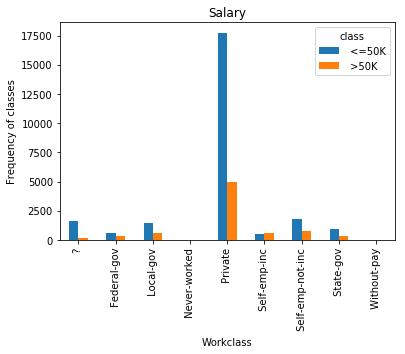

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(train["workclass"],train["class"]).plot(kind="bar")
plt.title('Salary')
plt.xlabel('Workclass')
plt.ylabel('Frequency of classes')
plt.show()

## Note:
1. The distribution and frequency of "income class" is different in terms of "workclass". So it is a good feature.

## The relationship between salary and education

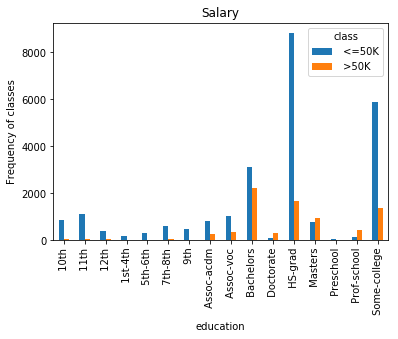

In [11]:
pd.crosstab(train["education"],train["class"]).plot(kind="bar")
plt.title('Salary')
plt.xlabel('education')
plt.ylabel('Frequency of classes')
plt.show()

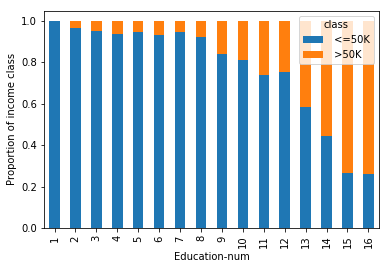

In [12]:
t = pd.crosstab(train["education-num"],train["class"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Education-num')
plt.ylabel('Proportion of income class')
plt.show()

## Note:
1. The proportion of income class is different in terms of "education-num". And there is some ordinal pattern in it. So we can keep the "education-num" and drop the highly correlated one "education".

## The relationship between salary and sex

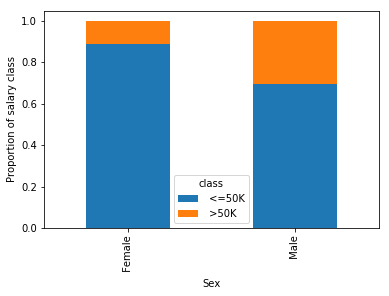

In [13]:
t = pd.crosstab(train["sex"],train["class"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Sex')
plt.ylabel('Proportion of salary class')
plt.show()

## The relationship between salary and country

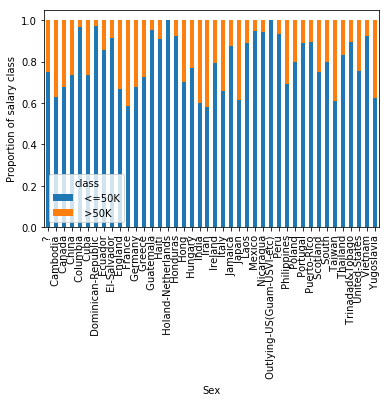

In [14]:
import matplotlib.pyplot as plt
t = pd.crosstab(train["native-country"],train["class"])
t.div(t.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Sex')
plt.ylabel('Proportion of salary class')
plt.rcParams["figure.figsize"] = [20,10]


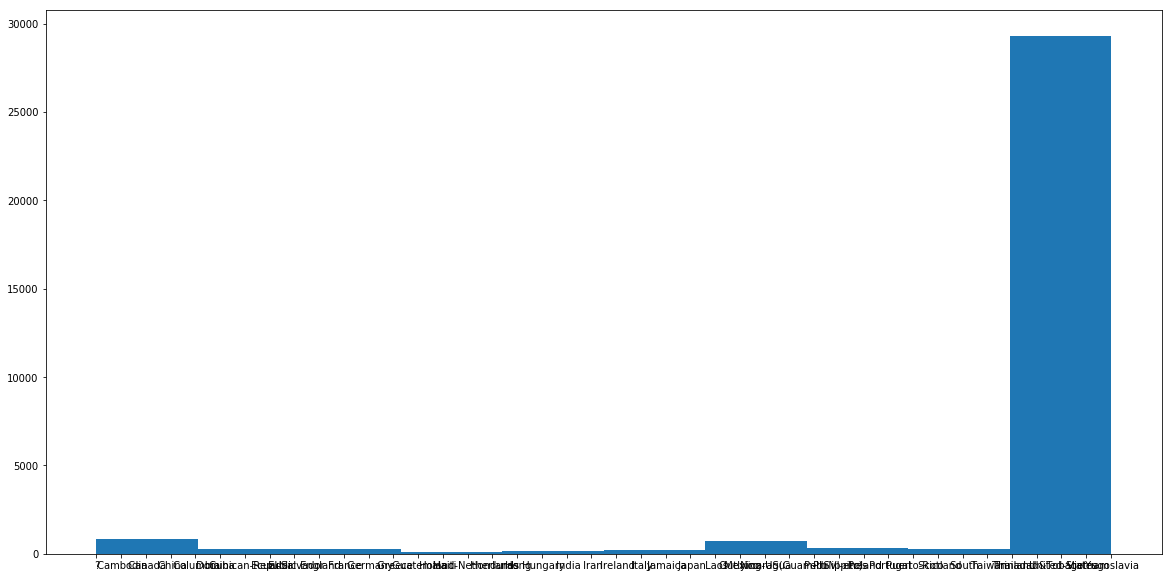

defaultdict(<class 'int'>, {' United-States': 29170, ' Cuba': 95, ' Jamaica': 81, ' India': 100, ' ?': 583, ' Mexico': 643, ' South': 80, ' Puerto-Rico': 114, ' Honduras': 13, ' England': 90, ' Canada': 121, ' Germany': 137, ' Iran': 43, ' Philippines': 198, ' Italy': 73, ' Poland': 60, ' Columbia': 59, ' Cambodia': 19, ' Thailand': 18, ' Ecuador': 28, ' Laos': 18, ' Taiwan': 51, ' Haiti': 44, ' Portugal': 37, ' Dominican-Republic': 70, ' El-Salvador': 106, ' France': 29, ' Guatemala': 64, ' China': 75, ' Japan': 62, ' Yugoslavia': 16, ' Peru': 31, ' Outlying-US(Guam-USVI-etc)': 14, ' Scotland': 12, ' Trinadad&Tobago': 19, ' Greece': 29, ' Nicaragua': 34, ' Vietnam': 67, ' Hong': 20, ' Ireland': 24, ' Hungary': 13, ' Holand-Netherlands': 1})


In [15]:
plt.hist(train["native-country"])
plt.rcParams["figure.figsize"] = [10,5]
plt.show()
from collections import defaultdict
d = defaultdict(int)
for each in train["native-country"]:
    d[each] += 1
print(d)

## Note:
1. Most of the observations come from United-States.
2. The proportion of income class is different in terms of different country. Thus, we keep this feature.

# Handling the categorical data

## Drop the "education" column:

In [16]:
train = train.drop("education",axis=1)
test = test.drop("education",axis=1)

In [17]:
complete_data = pd.concat([train,test],keys=["train","test"]) # Combine the two dataset. It will make the get_dummies method more convenient.

## Create the new column.

In [18]:
complete_data["capital_gain_extre"] = 0
complete_data.loc[complete_data["capital-gain"]==99999,"capital_gain_extre"] = 1

In [19]:
complete_data.loc["train"]
complete_data.loc["test"]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,capital_gain_extre
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,0
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,0
4,18,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.,0
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.,0
6,29,?,227026,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.,0
7,63,Self-emp-not-inc,104626,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.,0
8,24,Private,369667,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.,0
9,55,Private,104996,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.,0


In [20]:
# Convert all categorical columns to dummy variable
for each in train.select_dtypes(include="object").dtypes.index[:-1]:
    complete_data = pd.concat([complete_data,pd.get_dummies(complete_data[each],prefix = each,drop_first = True)],axis=1)

In [21]:
complete_data.columns.values

array(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class',
       'capital_gain_extre', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-se

In [22]:
len(complete_data.columns.values)

94